# В данном проекте я буду анализировать данные API о подписчиках и постах из группы Вконтакте "Фон"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
posts=pd.read_csv('data_posts_fon.csv')
subscribers=pd.read_csv('data_subsrcibers_fon.csv')

In [3]:
posts.head()

,Unnamed: 0,id,text,comments.count,likes.count,views.count,reposts.count
0,0,957005,"«Я не играю, а вдохновляюсь»: читайте пост, чт...",0,3,2014.0,0
1,1,957003,NaN,0,6,4063.0,3
2,2,956991,К Пушкину и Лермонтову присоединятся GTA и «На...,0,30,9439.0,8
3,3,956969,NaN,0,8,4491.0,0
4,4,956958,Сейчас бы в школу и поиграть тайком на уроке в...,3,58,12094.0,5


Начну с анализа постов в группе. Стоит отметить, что отсутствие текста в посте означает, что это вертикальное видео, которое выложили в ленту группы

In [4]:
posts['views.count'].max()

1258476.0

In [5]:
posts[posts['views.count']== 1258476.0]

,Unnamed: 0,id,text,comments.count,likes.count,views.count,reposts.count
200,200,955644,NaN,5,783,1258476.0,126


Больше всего просмотров в ленте набрал вертикальный ролик. Его можно найти по ссылке: https://vk.com/wall-60777940_955644

In [24]:
posts['reaction']=posts['likes.count']+posts['views.count']+posts['reposts.count']

Я создала столбец 'reaction', который суммирует всю активность подписчиков, связанную с постом. Это позволит понят, какой пост вызвал большую реакцию аудитории.

In [10]:
posts[posts['reaction']==posts['reaction'].max()]

,Unnamed: 0,id,text,comments.count,likes.count,views.count,reposts.count,reaction
200,200,955644,NaN,5,783,1258476.0,126,1259385.0


Больше всего реакций в ленте собрал тот же вертикальный ролик, у котрого больше всего просмотров. Его снова можно найти по ссылке: https://vk.com/wall-60777940_955644 Это юмористический ролик, случай, который в нём описан был у многих в жизни, поэтому скорее всего он так и отозвался у всех

Так бывает не всегда, больше ценятся ролики, которые вызывают много реакций, чем те, которые набирают много просмотров, но часто это взаимосвязано.

In [11]:
posts[posts['reaction']==posts['reaction'].min()]

,Unnamed: 0,id,text,comments.count,likes.count,views.count,reposts.count,reaction
5417,5417,690820,🎉 Внимание 🎉\n🎈Отличные новости в магазине MOL...,0,0,663.0,0,663.0


In [12]:
posts[posts['views.count']==posts['views.count'].min()]

,Unnamed: 0,id,text,comments.count,likes.count,views.count,reposts.count,reaction
5417,5417,690820,🎉 Внимание 🎉\n🎈Отличные новости в магазине MOL...,0,0,663.0,0,663.0


Отсутвие реакций на самом менее просматриваемом посте (https://vk.com/wall-60777940_690820) Это была пересылка рекламного поста, которая ни у кого не отозвалась. Пост выходил 4 года назад.

In [3]:
posts[posts['likes.count']==posts['likes.count'].max()]

,Unnamed: 0,id,text,comments.count,likes.count,views.count,reposts.count
15344,15344,457128,[club60777940|+ Подписаться],2,22599,770257.0,346


Больше всего лайков на посте https://vk.com/wall-60777940_457128 Это очень старый пост за 2017 год. Картинки такого плана сейчас были бы не актуальны

In [4]:
posts['likes.count'].mean()

175.69324983884334

В среднем на постах люди ставят около 175 лайков

In [7]:
posts.sort_values('views.count', ascending = False)

,Unnamed: 0,id,text,comments.count,likes.count,views.count,reposts.count
200,200,955644,NaN,5,783,1258476.0,126
40,40,956732,NaN,5,524,1033350.0,41
19,19,956869,NaN,0,262,1010877.0,128
196,196,955659,NaN,1,513,1008002.0,79
136,136,955998,NaN,12,5674,1001730.0,735
...,...,...,...,...,...,...,...
43431,43431,8,Mad Catz анонсирует мобильную клавиатуру S.T.R...,5,59,NaN,6
43432,43432,7,Sony представила новые беззеркальные камеры дл...,0,86,NaN,21
43433,43433,6,"Ematic Cinema Tab — 13,3-дюймовый Android-план...",2,7,NaN,0
43434,43434,5,Кейс-счеты для iPhone\n\nТрудно спорить с тем ...,8,62,NaN,14


Отсортировав датасет по количеству просмотров, можно понять, что больше всего собирают вертикальные видео, а в самом конце с отсутствие данных о просмотре стоят текстовые посты

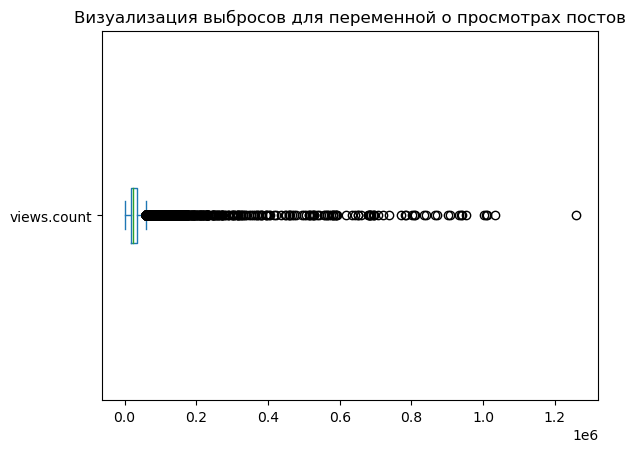

In [17]:
import matplotlib.pyplot as plt
posts['views.count'].plot(kind = "box", vert=False)
plt.title('Визуализация выбросов для переменной о просмотрах постов')
plt.show()

Выбросов много, так как количество просмотров часто разнится

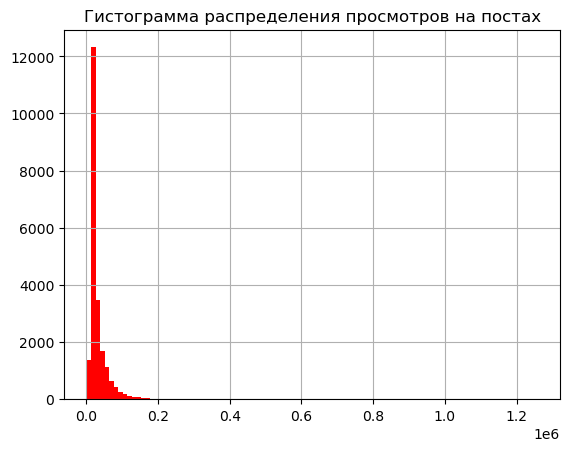

In [20]:
posts['views.count'].hist(bins=100, color="red")
plt.title('Гистограмма распределения просмотров на постах')
plt.show()

Чаще всего просмотров больше 12000

In [26]:
avg = posts['reaction'].mean()
std = posts['reaction'].std()
low = avg-2*std
up = avg+2*std
posts[(posts['reaction'] <low) | (posts['reaction'])].shape[0]

21934

In [27]:
posts['reaction'].mean()

34049.76807695815

Я посчитала количество выбросов для реакций на посты, их очень много, так как в среднем реакций 34049, но часто бывают и отлонения, как в положительную, так и в отрицательную сторону

In [28]:
posts.isna().sum()

Unnamed: 0            0
id                    0
text               8114
comments.count        0
likes.count           0
views.count       21502
reposts.count         0
reaction          21502
dtype: int64

В группе "Фон" 8114 пропущенных по тексту постов, это значит, что там выпустили 8114 вертикальных видео

21502 постов с отсутствием реакий и просмотров, посты, которые никто не видел, но они есть и их очень много

In [29]:
posts.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4904\3169560326.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  posts.corr()


,Unnamed: 0,id,comments.count,likes.count,views.count,reposts.count,reaction
Unnamed: 0,1.000000,-0.980819,-0.136883,-0.194833,-0.356184,-0.230046,-0.356068
id,-0.980819,1.000000,0.163361,0.167403,0.410795,0.282467,0.410390
comments.count,-0.136883,0.163361,1.000000,0.162726,0.222098,0.244594,0.222665
likes.count,-0.194833,0.167403,0.162726,1.000000,0.341895,0.298485,0.346566
views.count,-0.356184,0.410795,0.222098,0.341895,1.000000,0.356946,0.999986
reposts.count,-0.230046,0.282467,0.244594,0.298485,0.356946,1.000000,0.358892
reaction,-0.356068,0.410390,0.222665,0.346566,0.999986,0.358892,1.000000


Можем заметить, что количество реакций имеет сильную корреляционную связь с количеством просмотров.

<Axes: xlabel='views.count', ylabel='reaction'>

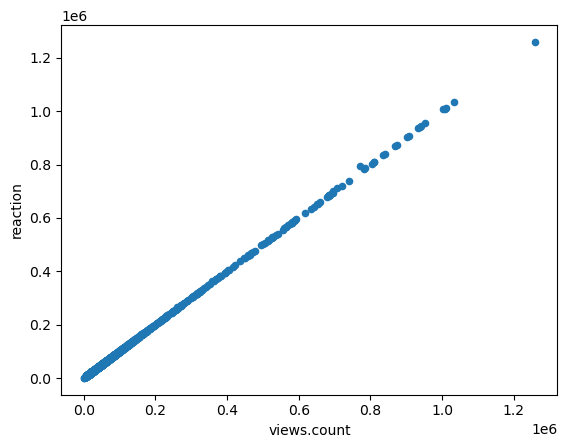

In [31]:
posts.plot('views.count', 'reaction', kind = 'scatter')

На графике рассеяния четко видна прямая линейная зависимость этих двух переменных

Таким образом мы выяснили, что в посты группы входят и вертикальные видео, они набирают больше всего просмотров. Но по реакциям лидирует пост с текстом. Количество реакций напрямую зависит от количества просмотров. 

# Теперь начнём рассматривать целевую аудиторию группы

In [35]:
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596533 entries, 0 to 596532
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         596533 non-null  int64  
 1   id                 596533 non-null  int64  
 2   city               482098 non-null  object 
 3   sex                596533 non-null  int64  
 4   first_name         596533 non-null  object 
 5   last_name          594011 non-null  object 
 6   can_access_closed  596533 non-null  bool   
 7   is_closed          596533 non-null  bool   
 8   bdate              456588 non-null  object 
 9   university         181312 non-null  float64
 10  university_name    64023 non-null   object 
 11  faculty            181312 non-null  float64
 12  faculty_name       51396 non-null   object 
 13  graduation         181312 non-null  float64
 14  education_form     41433 non-null   object 
 15  education_status   36167 non-null   object 
 16  ho

In [36]:
subscribers.head()

,Unnamed: 0,id,city,sex,first_name,last_name,can_access_closed,is_closed,bdate,university,university_name,faculty,faculty_name,graduation,education_form,education_status,home_town,deactivated,group
0,0,291,Сертолово,2,Виктор,Танчак,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Фон
1,1,453,Auckland,1,Ярославна,Гаген-Торн,True,False,8.10.1983,1.0,СПбГУ,7.0,Математико-механический,2007.0,Очное отделение,Выпускница (специалист),Санкт-Петербург,NaN,Фон
2,2,512,NaN,2,Егор,Деметрадзе,True,False,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,Новосибирск,NaN,Фон
3,3,634,Санкт-Петербург,2,Алексей,Шпаковский,True,False,21.11.1982,65.0,СПбГУТ им. Бонч-Бруевича,298.0,"Сетей связи, систем коммутации и вычислительно...",0.0,Очное отделение,Выпускник (специалист),Санкт-Петербург,NaN,Фон
4,4,762,Санкт-Петербург,2,Константин,Белоус,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Фон


city
sex
first_name
last_name
can_access_closed
is_closed
bdate
university
university_name
faculty
faculty_name
graduation
education_form
education_status
home_town
deactivated
group

**city** - город проживания, который указали подписчики у себя на странице
**sex** - пол
**first_name**-имя
**last_name**-фамилия
**can_access_closed**- тип страницы
**bdate** - дата рождения
**university** - код университета
**university_name**- название университета
**faculty** - код факультет
**faculty_name**- название факультета
**graduation** - год выпуска
**education_form** - форма образования
**education_status**- статус образования
**group** - анализируемая группа Вконтакте

In [8]:
subscribers.drop('deactivated', axis=1, inplace=True)
subscribers.drop('home_town', axis=1, inplace=True)

In [38]:
subscribers.head()

,Unnamed: 0,id,city,sex,first_name,last_name,can_access_closed,is_closed,bdate,university,university_name,faculty,faculty_name,graduation,education_form,education_status,home_town,group
0,0,291,Сертолово,2,Виктор,Танчак,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Фон
1,1,453,Auckland,1,Ярославна,Гаген-Торн,True,False,8.10.1983,1.0,СПбГУ,7.0,Математико-механический,2007.0,Очное отделение,Выпускница (специалист),Санкт-Петербург,Фон
2,2,512,NaN,2,Егор,Деметрадзе,True,False,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,Новосибирск,Фон
3,3,634,Санкт-Петербург,2,Алексей,Шпаковский,True,False,21.11.1982,65.0,СПбГУТ им. Бонч-Бруевича,298.0,"Сетей связи, систем коммутации и вычислительно...",0.0,Очное отделение,Выпускник (специалист),Санкт-Петербург,Фон
4,4,762,Санкт-Петербург,2,Константин,Белоус,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Фон


In [39]:
subscribers['group'].value_counts()

Фон    596533
Name: group, dtype: int64

In [41]:
subscribers['sex'].value_counts()

2    376040
1    220365
0       128
Name: sex, dtype: int64

На паблик подписано больше женщин, чем мужчин

In [45]:
376040/220365

1.7064415855512445

В 1.7 раз больше, чем мужчин, то есть почти в два раза

In [46]:
subscribers['city'].mode()

0    Москва
Name: city, dtype: object

Больше всего на группу подписано жителей Москвы

In [48]:
subscribers['city'].value_counts()

Москва                                51658
Санкт-Петербург                       35686
Киев                                  10510
Екатеринбург                           7600
Казань                                 7458
                                      ...  
Луковниково                               1
Saukkola                                  1
Михайловское (Валдайское с/п)             1
Новоселовка (Новоселовская община)        1
Глупеево                                  1
Name: city, Length: 12488, dtype: int64

Вторым по численности городом по количеству подписчиков "Фона" является Петербург. Более 10 тысяч человек из Киева смотрят контент группы "Фон" Вконтакте. То есть большая часть подписчиков не из России

In [50]:
subscribers['first_name'].value_counts()

Александр    24746
Сергей       17697
Андрей       15412
Алексей      14885
Дмитрий      14459
             ...  
Doz              1
Селия            1
Воробьёв         1
Динька           1
Yung             1
Name: first_name, Length: 34874, dtype: int64

Так как подписчики в основном из России, то мы можем выявить, что самое частое имя среди них Александр, да и в целом самые повторяющиеся имена именно у мужчин, хоть их и меньше подписано на паблик

In [51]:
subscribers['last_name'].value_counts()

Иванов        3735
Иванова       1998
Петров        1546
Смирнов       1338
Кузнецов      1177
              ... 
Ераков           1
Кифель           1
Odarenko         1
Нереальный       1
Лджэ             1
Name: last_name, Length: 179400, dtype: int64

А самые популярные фамилии у подписчиков по-настоящему русские, как мужские, так и женские Ивановы

In [52]:
subscribers['can_access_closed'].value_counts()

True     451867
False    144666
Name: can_access_closed, dtype: int64

In [53]:
451867/144666

3.123519002391716

По закрытости страниц подписчиков вышло, что в 3 раза больше открытых страниц, чем закрытых. Многие подписчики открыто относятся к своим личным данным

In [54]:
subscribers['education_form'].value_counts()

Очное отделение           29515
Заочное отделение         10086
Очно-заочное отделение     1660
Дистанционное обучение      119
Экстернат                    53
Name: education_form, dtype: int64

Чаще всего подписчики группы учились на очном отделении и получали высшее образование

In [57]:
subscribers[['sex', 'graduation']].corr()

,sex,graduation
sex,1.000000,-0.003153
graduation,-0.003153,1.000000


В попытке соотнести даные об образовании и пол, выявилось, что связь между ними отрицательная и близка к нулю, что означает их независимость друг от друга

In [59]:
subscribers['university_name'].value_counts()

МГУ                                                                                              1050
СПбГУ                                                                                             567
УрФУ им. первого Президента России Б. Н. Ельцина                                                  414
КПИ им. И. Сикорского                                                                             346
БГУ                                                                                               313
                                                                                                 ... 
НИИ СП им. Н. В. Склифосовского                                                                     1
АНБ РБ (бывш. ИНБ РБ)                                                                               1
Hochschule für Künste Bremen                                                                        1
Heinrich-Heine-Universität Düsseldorf                                             

In [60]:
subscribers['faculty_name'].value_counts()

Экономический                                                                          1871
Юридический                                                                            1305
Экономики и управления                                                                  495
Лечебный                                                                                412
Филологический                                                                          386
                                                                                       ... 
предпринимательства и финансов                                                            1
Факультет нефтегазохимии и полимерных материалов (Химической технологии полимеров)        1
романо-германская филология                                                               1
Исторического образования                                                                 1
מנהל מערכות בריאות (Health Systems Administration)                              

При анализе сфер образования, которое получали подписчики группы можно заметить, что больше всего получали образование в МГУ и СПбгу, также 313 человек, которые указывали на страницах, что обучались в Белорусском государственном университете, что также указывает на то, что группа популярна не только в России. Хоть и связь МегаФона работает только в России

Самый частый факультет - Экономический, возможно в целом это самое популярное образование среди подписчиков. Но в целом темой техники интересуются и юристы, и врачи, и филологи во многом.

In [7]:
subscribers.drop('faculty', axis=1, inplace=True)
subscribers.head()

,Unnamed: 0,id,city,sex,first_name,last_name,can_access_closed,is_closed,bdate,university,university_name,faculty_name,graduation,education_form,education_status,home_town,deactivated,group
0,0,291,Сертолово,2,Виктор,Танчак,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Фон
1,1,453,Auckland,1,Ярославна,Гаген-Торн,True,False,8.10.1983,1.0,СПбГУ,Математико-механический,2007.0,Очное отделение,Выпускница (специалист),Санкт-Петербург,NaN,Фон
2,2,512,NaN,2,Егор,Деметрадзе,True,False,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Новосибирск,NaN,Фон
3,3,634,Санкт-Петербург,2,Алексей,Шпаковский,True,False,21.11.1982,65.0,СПбГУТ им. Бонч-Бруевича,"Сетей связи, систем коммутации и вычислительно...",0.0,Очное отделение,Выпускник (специалист),Санкт-Петербург,NaN,Фон
4,4,762,Санкт-Петербург,2,Константин,Белоус,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Фон


Я удалила столбец 'faculty', так как данные о приведены в неточном виде, они не дают понять реальный факультет подписчиков

In [9]:
subscribers['education_status'].value_counts()

Выпускник (специалист)     7196
Студент (специалист)       5798
Выпускница (специалист)    5493
Студент (бакалавр)         3785
Студентка (специалист)     2906
Студентка (бакалавр)       1966
Выпускник (бакалавр)       1843
Выпускник (магистр)        1362
Выпускница (бакалавр)      1124
Доктор наук                1078
Выпускница (магистр)        835
Абитуриент                  721
Студент (магистр)           719
Кандидат наук               462
Студентка (магистр)         303
Аспирант                    233
Абитуриентка                204
Аспирантка                   73
Клинический ординатор        17
Адъюнкт                      15
Интерн                       12
Докторант                     9
Соискатель                    5
Ассистент-стажёр              4
Исследователь                 3
Соискательница                1
Name: education_status, dtype: int64

Большая часть тех подписчиков, которые указали свой статус в образовании являются выпускниками различных вузов, но также около 10 тысяч подписчиков сейчас являются студентами

Таким образом анализ целевой аудитории в основном проводился через выявление частотности данных по каждому столбцу таблицы, так как именно этот способ дааёт больше всего понять, кто является целевой аудиторией группы "Фон". 

Теперь, если соединить анализ двух таблиц, то ясно, что подписчикам группы, кокторые по большей части выпустились из университетов, получали разнообразное образование, живут в Москве или Петербурге, а также в других странах около России нравятся быстрые юмористические ролики, которые можно переложить на свою жизнь.